Created by [Nathan Kelber](http://nkelber.com) and Ted Lawless for [JSTOR Labs](https://labs.jstor.org/) under [Creative Commons CC BY License](https://creativecommons.org/licenses/by/4.0/)<br />
**For questions/comments/improvements, email nathan.kelber@ithaka.org.**<br />
![CC BY License Logo](https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/CC_BY.png)
____

# Exploring Metadata

**Description of methods in this notebook:**
This [notebook](https://docs.tdm-pilot.org/key-terms/#jupyter-notebook) shows how to explore the [metadata](https://docs.tdm-pilot.org/key-terms/#metadata) of your [JSTOR](https://docs.tdm-pilot.org/key-terms/#jstor) and/or [Portico](https://docs.tdm-pilot.org/key-terms/#portico) [dataset](https://docs.tdm-pilot.org/key-terms/#dataset) using [Python](https://docs.tdm-pilot.org/key-terms/#python). The following processes are described:

* Automatically importing your [JSTOR](https://docs.tdm-pilot.org/key-terms/#jstor) and/or [Portico](https://docs.tdm-pilot.org/key-terms/#portico) [dataset](https://docs.tdm-pilot.org/key-terms/#dataset)
* Converting your [JSTOR](https://docs.tdm-pilot.org/key-terms/#jstor) and/or [Portico](https://docs.tdm-pilot.org/key-terms/#portico) [dataset](https://docs.tdm-pilot.org/key-terms/#dataset) into a Python list
* Using the `.get` method to retrieve bibliographic metadata
* Checking if an item is in your [dataset](https://docs.tdm-pilot.org/key-terms/#dataset) against the dataset metadata
* Turning your [dataset](https://docs.tdm-pilot.org/key-terms/#dataset) into a [Pandas](https://docs.tdm-pilot.org/key-terms/#pandas) dataframe
* Filtering out [dataset](https://docs.tdm-pilot.org/key-terms/#dataset) materials like journal front matter, back matter, notes, etc.
* Visualizing the contents of your [Pandas](https://docs.tdm-pilot.org/key-terms/#pandas) dataframe by decade

**Difficulty:** Intermediate

**Knowledge Required:** 
* [Python Basics I](./0-python-basics-1.ipynb)
* [Python Basics II](./0-python-basics-2.ipynb)
* [Python Basics III](./0-python-basics-3.ipynb)

**Knowledge Recommended:**

* Read ["What is a JSTOR/Portico dataset (format and structure"](https://docs.tdm-pilot.org/what-format-are-jstor-portico-datasets/)
* A familiarity with [Pandas](https://docs.tdm-pilot.org/key-terms/#pandas) is helpful but not required.

**Completion time:** 45 minutes

**Data Format:** [JSTOR](https://docs.tdm-pilot.org/key-terms/#jstor)/[Portico](https://docs.tdm-pilot.org/key-terms/#portico) [JSON Lines (.jsonl)](https://docs.tdm-pilot.org/key-terms/#jsonl)

**Libraries Used:**
* [json](https://docs.tdm-pilot.org/key-terms/#json-python-library) to convert our dataset from json lines format to a Python list
* [Pandas](https://docs.tdm-pilot.org/key-terms/#pandas) to help visualize the metadata
____

## Import your dataset

We'll use the `tdm_client` library to automatically upload your dataset. We import the `Dataset` module from the `tdm_client` library. The tdm_client library contains functions for connecting to the JSTOR server containing the [corpus](https://docs.tdm-pilot.org/key-terms/#corpus) [dataset](https://docs.tdm-pilot.org/key-terms/#dataset). To analyze your dataset, use the [dataset ID](https://docs.tdm-pilot.org/key-terms//#dataset-ID) provided when you created your [dataset](https://docs.tdm-pilot.org/key-terms//#dataset). A copy of your [dataset ID](https://docs.tdm-pilot.org/key-terms//#dataset-ID) was sent to your email when you created your [corpus](https://docs.tdm-pilot.org/key-terms/#corpus). It should look like a long series of characters surrounded by dashes. If you haven't created a dataset, feel free to use a sample dataset. Here's a [list by discipline](https://docs.tdm-pilot.org/sample-datasets/). Advanced users can also [upload a dataset from their local machine](https://docs.tdm-pilot.org/uploading-a-dataset/).

In [88]:
#Importing your dataset with a dataset ID
import tdm_client
#Load the sample dataset, the full run of Shakespeare Quarterly from 1950-2013.
tdm_client.get_dataset("f6ae29d4-3a70-36ee-d601-20a8c0311273", "sampleJournalAnalysis")

'datasets/sampleJournalAnalysis.jsonl'

Before we can begin working with our [dataset](https://docs.tdm-pilot.org/key-terms/#dataset), we need to convert the [JSON lines](https://docs.tdm-pilot.org/key-terms/#jsonl) file format into [Python](https://docs.tdm-pilot.org/key-terms/#python) so we can work with it. Remember that each line of our [JSON lines](https://docs.tdm-pilot.org/key-terms/#jsonl) file represents a single text, whether that is a journal article, book, or something else. We will create a [Python](https://docs.tdm-pilot.org/key-terms/#python) list that contains every document. Within each list item for each document, we will use a [Python dictionary](https://docs.tdm-pilot.org/key-terms/#python-dictionary) of [key/value pairs](https://docs.tdm-pilot.org/key-terms/#key-value-pair) to store information related to that document. [Read more about the dataset format](https://docs.tdm-pilot.org/what-format-are-jstor-portico-datasets/).

Essentially we will have a [list](https://docs.tdm-pilot.org/key-terms/#python-list) of documents numbered, from zero to the last document. Each [list](https://docs.tdm-pilot.org/key-terms/#python-list) item then will be composed of a [dictionary](https://docs.tdm-pilot.org/key-terms/#python-dictionary) of [key/value pairs](https://docs.tdm-pilot.org/key-terms/#key-value-pair) that allows us to retrieve information from that particular document by number. The structure will look something like this:

![Structure of the corpus, a list of dictionaries](https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/CorpusView.png)

For each item in our list we will be able to use [key/value pairs](https://docs.tdm-pilot.org/key-terms/#key-value-pair) to get a **value** if we supply a **key**. We will call our [Python list](https://docs.tdm-pilot.org/key-terms/#python-list) variable `all_documents` since it will contain all of the documents in our [corpus](https://docs.tdm-pilot.org/key-terms/#corpus).

In [89]:
# Replace with your filename and be sure your file is in your datasets folder
file_name = 'sampleJournalAnalysis.jsonl' 

# Import the json module
import json
# Create an empty new list variable named `all_documents`
all_documents = [] 
# Temporarily open the file `filename` in the datasets/ folder
with open('./datasets/' + file_name) as dataset_file: 
    #for each line in the dataset file
    for line in dataset_file: 
        # Read each line into a Python dictionary.
        # Create a variable document that contains the line using json.loads to convert the json key/value pairs to a python dictionary
        document = json.loads(line) 
        # Append a new list item to `all_documents` containing the dictionary we created.
        all_documents.append(document) 

Now all of our documents have been converted from our original [JSON lines](https://docs.tdm-pilot.org/key-terms/#jsonl) file format (.jsonl) into a [python List](https://docs.tdm-pilot.org/key-terms/#python-list) variable named `all_documents`. Let's see what we can discover about our [corpus](https://docs.tdm-pilot.org/key-terms/#corpus) with a few simple methods.

First, we can determine how many texts are in our [dataset](https://docs.tdm-pilot.org/key-terms/#dataset) by using the `len()` function to get the size of `all_documents`. 

In [90]:
len(all_documents)

6687

---
## Exploring the Metadata of a Single Article

We can also choose a single document and get [bibliographic metadata](https://docs.tdm-pilot.org/key-terms/#bibliographic-metadata) for that item. First we select a document from our list ```all_documents```. (In computer code, 0 is the first item, 1 is the second item, 2 is the third item, etc.) If we wanted to select the first item, we could use the `.get` method to retrieve the title for the item in our [list](https://docs.tdm-pilot.org/key-terms/#python-list) by writing `all_documents[0]`. 


In [91]:
# Define a new dictionary variable `chosenDocument` that is equal to the first item in our `all_documents` list
chosen_document = all_documents[7] # Select the eighth article in our list
chosen_document.get('title') #get the corresponding value for the key 'title'

'Creative Uncreation In King Lear'

We can also use the `.get` method to discover additional [bibliographic metadata](https://docs.tdm-pilot.org/key-terms/#bibliographic-metadata). Here are the most significant [bibliographic metadata](https://docs.tdm-pilot.org/key-terms/#bibliographic-metadata) items found with a [JSTOR](https://docs.tdm-pilot.org/key-terms/#jstor) item:
* `title` returns the title
* `creators` returns the authors in a Python list
* `isPartOf` returns the journal title
* `datePublished` returns the publication date
* `id` returns the stable URL for a JSTOR item
* `identifier` returns a Python list of dictionaries containing the ISSN #, OCLC #, and DOI #. 
* `volumeNumber` returns the journal volume number
* `pageCount` returns the number of pages in the print article
* `pagination` returns the page number range of the print article
* `pageStart` returns the first print page
* `pageEnd` returns the last print page
* `wordCount` returns the number of words in the article
* `docType` returns the type of document, usually `article` for journal article
* `url` returns the stable url for the document
* `provider` returns the source of the data, for JSTOR articles usually `jstor`
* `language` returns the language the article is written in

Let's try all these on our `chosenDocument`. 

In [92]:
print("Title: " + chosen_document.get('title'))
print("Authors: ", end='')
print(chosen_document.get('creators'))
print("Journal: " + chosen_document.get('isPartOf'))
print("Publication Date: " + chosen_document.get('datePublished'))
#print("Publisher: " + chosen_document.get('publisher'))
print("ID: " + chosen_document.get('id'))
print("ISSN, OCLC, DOI: ", end='')
print(chosen_document.get('identifier'))
#print("Volume Number: " + chosen_document.get('volumeNumber'))
print("Number of Pages: " + str(chosen_document.get('pageCount')))
print("Print Pagination: " + str(chosen_document.get('pagination')))
print("First Page: " + str(chosen_document.get('pageStart')))
print("Last Page: " + str(chosen_document.get('pageEnd')))
print("Number of words: " + str(chosen_document.get('wordCount')))
print("Document Type: " + chosen_document.get('docType'))
print("URL: " + chosen_document.get('url'))
print("Provider: " + chosen_document.get('provider'))
print("Language: " + str(chosen_document.get('language')))

Title: Creative Uncreation In King Lear
Authors: ['James L. Calderwood']
Journal: Shakespeare Quarterly
Publication Date: 1986-04-01T00:00:00Z
ID: http://www.jstor.org/stable/2870188
ISSN, OCLC, DOI: [{'name': 'issn', 'value': '00373222'}, {'name': 'oclc', 'value': '39852252'}, {'name': 'local_doi', 'value': '10.2307/2870188'}]
Number of Pages: 15
Print Pagination: pp. 5-19
First Page: 5
Last Page: 19
Number of words: 8966
Document Type: article
URL: http://www.jstor.org/stable/2870188
Provider: jstor
Language: ['eng']


We can see every [Python dictionary](https://docs.tdm-pilot.org/key-terms/#python-dictionary) **key** in the [metadata](https://docs.tdm-pilot.org/key-terms/#metadata) by using the `.keys` method. We could use this in conjunction with the `print()` function, but we will use the `list()` function here to make it a little neater for reading purposes.

In [93]:
#print(chosen_document.keys())# Uncomment the # in front of print to run this line of code
list(chosen_document.keys()) # Create a list of every Python dictionary key within `chosen_document`

['id',
 'docType',
 'title',
 'creators',
 'isPartOf',
 'sourceCategory',
 'pageStart',
 'url',
 'volumeNumber',
 'language',
 'pageEnd',
 'pageCount',
 'pagination',
 'datePublished',
 'publicationYear',
 'publisher',
 'wordCount',
 'unigramCount',
 'tdmCategory',
 'provider',
 'outputFormat',
 'identifier']

Of course, we could also list all the [Python dictionary](https://docs.tdm-pilot.org/key-terms/#python-dictionary) **values**, but the output will be quite long since it includes the word counts for every word that is in the article. (In fact, it includes the count for every unique [string](https://docs.tdm-pilot.org/key-terms/#string) in the article. We'll address the distinction in the [word frequencies](https://docs.tdm-pilot.org/key-terms/#word-frequency) [notebooks](https://docs.tdm-pilot.org/key-terms/#jupyter-notebook).) The word counts are found within `unigramCount` which we'll address in the word frequencies notebook. 

In [94]:
# Uncomment the # in the next line to display all values in chosen_document
#list(chosen_document.values())

---
## Checking if a particular document is in the corpus

Let's return to our larger [corpus](https://docs.tdm-pilot.org/key-terms/#corpus) `all_documents` to do some exploratory analysis. What if we wanted to check if a particular item was in the [corpus](https://docs.tdm-pilot.org/key-terms/#corpus)?

Assuming the item is from JSTOR, we could search out any journal article on jstor.org. The article description page will feature a stable url.

![A JSTOR description page](https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/jstorDescription.png)

We already saw above that the stable URL is stored in both the `id` and `url` dictionaries, so we can check our whole [corpus](https://docs.tdm-pilot.org/key-terms/#corpus) for a particular JSTOR article if we know the stable URL. (If we are looking at a Portico item, they will have an `id` that starts with `ark://` and `url` that lists a `doi`.) From the image above, we can see the article in question has a stable URL of: https://www.jstor.org/stable/2871420

We can check whether the item above is in `all_documents` with the `in` or `not in` operators. First though, we need a list of all of the URLs in our corpus. We'll create a variable `list_of_urls` to hold all these values. Then we can check to see if our stable URL (http://www.jstor.org/stable/2871420) is in that list.

In [95]:
# We create a blank list that will contain all of the urls in our dataset
list_of_urls = [] 
# For every document in our dataset
for document in all_documents:
    # Create a url_value variable to hold the URL for that document
    url_value = document.get('url') 
    # Append or add that URL to our Python list `list_of_urls`
    list_of_urls.append(url_value)
# Show the first five items in our list of urls
list(list_of_urls[0:5]) 

['http://www.jstor.org/stable/2869980',
 'http://www.jstor.org/stable/2870198',
 'http://www.jstor.org/stable/2870199',
 'http://www.jstor.org/stable/2870209',
 'http://www.jstor.org/stable/2870208']

Now that we have a [list](https://docs.tdm-pilot.org/key-terms/#python-list) of all the URLs in our [corpus](https://docs.tdm-pilot.org/key-terms/#corpus) in the `list_of_urls` variable, let's use the `in` operator to discover whether our text is in the [corpus](https://docs.tdm-pilot.org/key-terms/#corpus). If the article is in our [dataset](https://docs.tdm-pilot.org/key-terms/#dataset), we will receive `true`. If the article is not our [dataset](https://docs.tdm-pilot.org/key-terms/#dataset), we will receive `false`.

*Note that the stable URL from jstor.org uses a secure address starting with "https://". Our dictionary values, however, use a standard address beginning with "http://".
* http**s**://
* http://

You'll need to remove the "s" to run this test since our `list_of_urls` are not secure addresses.

In [96]:
'http://www.jstor.org/stable/2871420' in list_of_urls

True

Now we have a good idea of what [metadata](https://docs.tdm-pilot.org/key-terms/#metadata) is in our [corpus](https://docs.tdm-pilot.org/key-terms/#corpus) and how we might retrieve it. We were able to use the `in` operator above to check if a particular article was in the [corpus](https://docs.tdm-pilot.org/key-terms/#corpus) using the URL. Of course, we could also check to see if a particular journal, author, publisher, or DOI # was in our corpus using a similar method. 

We'll finish this [notebook](https://docs.tdm-pilot.org/key-terms/#jupyter-notebook) by taking a big picture look at the [corpus](https://docs.tdm-pilot.org/key-terms/#corpus). What largescale patterns exist in this [corpus](https://docs.tdm-pilot.org/key-terms/#corpus) over the decades? We'll use [Pandas](https://docs.tdm-pilot.org/key-terms/#pandas) to help with our analysis. If you would like to learn more about [Pandas](https://docs.tdm-pilot.org/key-terms/#pandas), we recommend the [Python Pandas tutorial at learndatasci.com](https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/). For now, we will create a couple visualizations for demonstration purposes.

---
## Explore Corpus Metadata with Pandas

In [97]:
# Imports pandas and allows us to call it with the phrase pd
import pandas as pd

To use [Pandas](https://docs.tdm-pilot.org/key-terms/#pandas), we need to import it first. The `as pd` lets us use the shorthand `pd` when we want to call [Pandas](https://docs.tdm-pilot.org/key-terms/#pandas) instead writing out the entire word `pandas`. 

Now we can turn our [Python list](https://docs.tdm-pilot.org/key-terms/#python-list) `all_documents` into a [Pandas](https://docs.tdm-pilot.org/key-terms/#pandas) [dataframe](https://docs.tdm-pilot.org/key-terms/#pandas-dataframe). This will enable us to manipulate and view our data as a table or a graph. We will call our [dataframe](https://docs.tdm-pilot.org/key-terms/#pandas-dataframe) `df`.

In [98]:
df = pd.DataFrame(all_documents)

Let's see what our [corpus](https://docs.tdm-pilot.org/key-terms/#corpus) looks like in table form. We can use the `.head()` method to show us the first five rows of our data as a table.

In [99]:
df.head()

,abstract,bigramCount,creators,datePublished,docType,id,identifier,isPartOf,language,outputFormat,...,publicationYear,publisher,sourceCategory,tdmCategory,title,trigramCount,unigramCount,url,volumeNumber,wordCount
0,NaN,NaN,[R. A. Foakes],1986-07-01T00:00:00Z,article,http://www.jstor.org/stable/2869980,"[{'name': 'issn', 'value': '00373222'}, {'name...",Shakespeare Quarterly,[eng],[unigram],...,1986,Folger Shakespeare Library,"[Language & Literature, Humanities, Performing...","[Literature (General), History General, Englis...",Review Article,NaN,"{'the': 56, 'of': 47, 'to': 32, 'and': 26, 'a'...",http://www.jstor.org/stable/2869980,2,935
1,NaN,NaN,[Robyn S. Heales],1986-04-01T00:00:00Z,article,http://www.jstor.org/stable/2870198,"[{'name': 'issn', 'value': '00373222'}, {'name...",Shakespeare Quarterly,[eng],[unigram],...,1986,Folger Shakespeare Library,"[Language & Literature, Humanities, Performing...","[Periodicals, Literature (General), Arts in ge...",Shakespeare in Sydney,NaN,"{'the': 107, 'of': 79, 'and': 62, 'a': 61, 'to...",http://www.jstor.org/stable/2870198,1,2032
2,NaN,NaN,[Ronald R. Macdonald],1986-04-01T00:00:00Z,article,http://www.jstor.org/stable/2870199,"[{'name': 'issn', 'value': '00373222'}, {'name...",Shakespeare Quarterly,[eng],[unigram],...,1986,Folger Shakespeare Library,"[Language & Literature, Humanities, Performing...","[Literature (General), Periodicals, Academies ...","Shakespeare in the Berkshires, 1985",NaN,"{'the': 113, 'of': 79, 'and': 56, 'to': 39, 'i...",http://www.jstor.org/stable/2870199,1,1805
3,NaN,NaN,[Laura G. Bromley],1986-04-01T00:00:00Z,article,http://www.jstor.org/stable/2870209,"[{'name': 'issn', 'value': '00373222'}, {'name...",Shakespeare Quarterly,[eng],[unigram],...,1986,Folger Shakespeare Library,"[Language & Literature, Humanities, Performing...","[Socialism. Communism. Anarchism, Religions. M...",Review Article,NaN,"{'of': 71, 'the': 65, 'and': 38, 'in': 24, 'hi...",http://www.jstor.org/stable/2870209,1,1023
4,NaN,NaN,[James H. Maddox],1986-04-01T00:00:00Z,article,http://www.jstor.org/stable/2870208,"[{'name': 'issn', 'value': '00373222'}, {'name...",Shakespeare Quarterly,[eng],[unigram],...,1986,Folger Shakespeare Library,"[Language & Literature, Humanities, Performing...","[English literature, Biography, Modern languag...",Review Article,NaN,"{'the': 54, 'of': 50, 'and': 25, 'in': 24, 'to...",http://www.jstor.org/stable/2870208,1,965


Now we can see the first part of all the [metadata](https://docs.tdm-pilot.org/key-terms/#metadata) we have been discussing in table form. Much clearer! There's a lot of [metadata](https://docs.tdm-pilot.org/key-terms/#metadata) here so you may need to scroll right to see all the columns. Long items in this view are abbreviated with `...` to signify that they continue past what is shown. Let's use our new [Pandas](https://docs.tdm-pilot.org/key-terms/#pandas) [dataframe](https://docs.tdm-pilot.org/key-terms/#pandas-dataframe) to learn a little more about our [corpus](https://docs.tdm-pilot.org/key-terms/#corpus).

First, we may not be interested in every column so let's simplify our dataframe by dropping columns that may not be useful to us. We'll drop:

* docType
* identifier
* language
* outputFormat
* sourceCategory
* tdmCategory
* pageEnd
* pageStart
* pagination
* datePublished

In [100]:
df = df.drop(['identifier', 'outputFormat', 'sourceCategory', 'pageEnd', 'pageStart', 'pagination', 'datePublished'], axis=1) #drop each of these columns
df #display df

,abstract,bigramCount,creators,docType,id,isPartOf,language,pageCount,provider,publicationYear,publisher,tdmCategory,title,trigramCount,unigramCount,url,volumeNumber,wordCount
0,NaN,NaN,[R. A. Foakes],article,http://www.jstor.org/stable/2869980,Shakespeare Quarterly,[eng],2,jstor,1986,Folger Shakespeare Library,"[Literature (General), History General, Englis...",Review Article,NaN,"{'the': 56, 'of': 47, 'to': 32, 'and': 26, 'a'...",http://www.jstor.org/stable/2869980,2,935
1,NaN,NaN,[Robyn S. Heales],article,http://www.jstor.org/stable/2870198,Shakespeare Quarterly,[eng],3,jstor,1986,Folger Shakespeare Library,"[Periodicals, Literature (General), Arts in ge...",Shakespeare in Sydney,NaN,"{'the': 107, 'of': 79, 'and': 62, 'a': 61, 'to...",http://www.jstor.org/stable/2870198,1,2032
2,NaN,NaN,[Ronald R. Macdonald],article,http://www.jstor.org/stable/2870199,Shakespeare Quarterly,[eng],4,jstor,1986,Folger Shakespeare Library,"[Literature (General), Periodicals, Academies ...","Shakespeare in the Berkshires, 1985",NaN,"{'the': 113, 'of': 79, 'and': 56, 'to': 39, 'i...",http://www.jstor.org/stable/2870199,1,1805
3,NaN,NaN,[Laura G. Bromley],article,http://www.jstor.org/stable/2870209,Shakespeare Quarterly,[eng],2,jstor,1986,Folger Shakespeare Library,"[Socialism. Communism. Anarchism, Religions. M...",Review Article,NaN,"{'of': 71, 'the': 65, 'and': 38, 'in': 24, 'hi...",http://www.jstor.org/stable/2870209,1,1023
4,NaN,NaN,[James H. Maddox],article,http://www.jstor.org/stable/2870208,Shakespeare Quarterly,[eng],2,jstor,1986,Folger Shakespeare Library,"[English literature, Biography, Modern languag...",Review Article,NaN,"{'the': 54, 'of': 50, 'and': 25, 'in': 24, 'to...",http://www.jstor.org/stable/2870208,1,965
5,NaN,NaN,[Lars Engle],article,http://www.jstor.org/stable/2870189,Shakespeare Quarterly,[eng],18,jstor,1986,Folger Shakespeare Library,"[English literature, Periodicals, Christian De...","""Thrift is Blessing"": Exchange and Explanation...",NaN,"{'the': 405, 'of': 302, 'to': 264, 'and': 226,...",http://www.jstor.org/stable/2870189,1,9332
6,NaN,NaN,"[Paul Bertram, Frank Cossa]",article,http://www.jstor.org/stable/2870193,Shakespeare Quarterly,[eng],14,jstor,1986,Folger Shakespeare Library,[Visual arts],'Willm̄ Shakespeare 1609': The Flower Portrait...,NaN,"{'the': 534, 'of': 230, 'in': 169, 'to': 121, ...",http://www.jstor.org/stable/2870193,1,5803
7,NaN,NaN,[James L. Calderwood],article,http://www.jstor.org/stable/2870188,Shakespeare Quarterly,[eng],15,jstor,1986,Folger Shakespeare Library,"[English literature, Periodicals, Literature (...",Creative Uncreation In King Lear,NaN,"{'the': 492, 'of': 359, 'and': 233, 'to': 188,...",http://www.jstor.org/stable/2870188,1,8966
8,NaN,NaN,[Georgia Christopher],article,http://www.jstor.org/stable/2870203,Shakespeare Quarterly,[eng],3,jstor,1986,Folger Shakespeare Library,"[Literature (General), English literature, Lit...",Review Article,NaN,"{'the': 76, 'of': 66, 'and': 33, 'to': 29, 'is...",http://www.jstor.org/stable/2870203,1,1250
9,NaN,NaN,[John Boe],article,http://www.jstor.org/stable/2870194,Shakespeare Quarterly,[eng],2,jstor,1986,Folger Shakespeare Library,"[English literature, Books (General). Writing....",Mr. W. H.: A New Candidate,NaN,"{'the': 38, 'to': 24, 'a': 23, 'of': 21, 'in':...",http://www.jstor.org/stable/2870194,1,866


In [101]:
df = df.dropna(subset=['creators']) #drop all articles with no value under 'creators'
df #display df

,abstract,bigramCount,creators,docType,id,isPartOf,language,pageCount,provider,publicationYear,publisher,tdmCategory,title,trigramCount,unigramCount,url,volumeNumber,wordCount
0,NaN,NaN,[R. A. Foakes],article,http://www.jstor.org/stable/2869980,Shakespeare Quarterly,[eng],2,jstor,1986,Folger Shakespeare Library,"[Literature (General), History General, Englis...",Review Article,NaN,"{'the': 56, 'of': 47, 'to': 32, 'and': 26, 'a'...",http://www.jstor.org/stable/2869980,2,935
1,NaN,NaN,[Robyn S. Heales],article,http://www.jstor.org/stable/2870198,Shakespeare Quarterly,[eng],3,jstor,1986,Folger Shakespeare Library,"[Periodicals, Literature (General), Arts in ge...",Shakespeare in Sydney,NaN,"{'the': 107, 'of': 79, 'and': 62, 'a': 61, 'to...",http://www.jstor.org/stable/2870198,1,2032
2,NaN,NaN,[Ronald R. Macdonald],article,http://www.jstor.org/stable/2870199,Shakespeare Quarterly,[eng],4,jstor,1986,Folger Shakespeare Library,"[Literature (General), Periodicals, Academies ...","Shakespeare in the Berkshires, 1985",NaN,"{'the': 113, 'of': 79, 'and': 56, 'to': 39, 'i...",http://www.jstor.org/stable/2870199,1,1805
3,NaN,NaN,[Laura G. Bromley],article,http://www.jstor.org/stable/2870209,Shakespeare Quarterly,[eng],2,jstor,1986,Folger Shakespeare Library,"[Socialism. Communism. Anarchism, Religions. M...",Review Article,NaN,"{'of': 71, 'the': 65, 'and': 38, 'in': 24, 'hi...",http://www.jstor.org/stable/2870209,1,1023
4,NaN,NaN,[James H. Maddox],article,http://www.jstor.org/stable/2870208,Shakespeare Quarterly,[eng],2,jstor,1986,Folger Shakespeare Library,"[English literature, Biography, Modern languag...",Review Article,NaN,"{'the': 54, 'of': 50, 'and': 25, 'in': 24, 'to...",http://www.jstor.org/stable/2870208,1,965
5,NaN,NaN,[Lars Engle],article,http://www.jstor.org/stable/2870189,Shakespeare Quarterly,[eng],18,jstor,1986,Folger Shakespeare Library,"[English literature, Periodicals, Christian De...","""Thrift is Blessing"": Exchange and Explanation...",NaN,"{'the': 405, 'of': 302, 'to': 264, 'and': 226,...",http://www.jstor.org/stable/2870189,1,9332
6,NaN,NaN,"[Paul Bertram, Frank Cossa]",article,http://www.jstor.org/stable/2870193,Shakespeare Quarterly,[eng],14,jstor,1986,Folger Shakespeare Library,[Visual arts],'Willm̄ Shakespeare 1609': The Flower Portrait...,NaN,"{'the': 534, 'of': 230, 'in': 169, 'to': 121, ...",http://www.jstor.org/stable/2870193,1,5803
7,NaN,NaN,[James L. Calderwood],article,http://www.jstor.org/stable/2870188,Shakespeare Quarterly,[eng],15,jstor,1986,Folger Shakespeare Library,"[English literature, Periodicals, Literature (...",Creative Uncreation In King Lear,NaN,"{'the': 492, 'of': 359, 'and': 233, 'to': 188,...",http://www.jstor.org/stable/2870188,1,8966
8,NaN,NaN,[Georgia Christopher],article,http://www.jstor.org/stable/2870203,Shakespeare Quarterly,[eng],3,jstor,1986,Folger Shakespeare Library,"[Literature (General), English literature, Lit...",Review Article,NaN,"{'the': 76, 'of': 66, 'and': 33, 'to': 29, 'is...",http://www.jstor.org/stable/2870203,1,1250
9,NaN,NaN,[John Boe],article,http://www.jstor.org/stable/2870194,Shakespeare Quarterly,[eng],2,jstor,1986,Folger Shakespeare Library,"[English literature, Books (General). Writing....",Mr. W. H.: A New Candidate,NaN,"{'the': 38, 'to': 24, 'a': 23, 'of': 21, 'in':...",http://www.jstor.org/stable/2870194,1,866


In [102]:
# Examples for cleaning up the data based on the values found under 'title'
df = df[df.title != 'Review Article'] #remove articles with title "Review Article"
df = df[df.title != 'Front Matter'] #remove articles with title "Front Matter"
df = df[df.title != 'Back Matter'] #remove articles with title "Back Matter"
df = df[df.wordCount > 3000] #remove articles with fewer than 3000 words
# Adjust this variable depending on your journal and how you define article by length
df #display df

,abstract,bigramCount,creators,docType,id,isPartOf,language,pageCount,provider,publicationYear,publisher,tdmCategory,title,trigramCount,unigramCount,url,volumeNumber,wordCount
5,NaN,NaN,[Lars Engle],article,http://www.jstor.org/stable/2870189,Shakespeare Quarterly,[eng],18,jstor,1986,Folger Shakespeare Library,"[English literature, Periodicals, Christian De...","""Thrift is Blessing"": Exchange and Explanation...",NaN,"{'the': 405, 'of': 302, 'to': 264, 'and': 226,...",http://www.jstor.org/stable/2870189,1,9332
6,NaN,NaN,"[Paul Bertram, Frank Cossa]",article,http://www.jstor.org/stable/2870193,Shakespeare Quarterly,[eng],14,jstor,1986,Folger Shakespeare Library,[Visual arts],'Willm̄ Shakespeare 1609': The Flower Portrait...,NaN,"{'the': 534, 'of': 230, 'in': 169, 'to': 121, ...",http://www.jstor.org/stable/2870193,1,5803
7,NaN,NaN,[James L. Calderwood],article,http://www.jstor.org/stable/2870188,Shakespeare Quarterly,[eng],15,jstor,1986,Folger Shakespeare Library,"[English literature, Periodicals, Literature (...",Creative Uncreation In King Lear,NaN,"{'the': 492, 'of': 359, 'and': 233, 'to': 188,...",http://www.jstor.org/stable/2870188,1,8966
13,NaN,NaN,[David Wheeler],article,http://www.jstor.org/stable/2870307,Shakespeare Quarterly,[eng],12,jstor,1985,Folger Shakespeare Library,"[English literature, Literature (General), Per...",Eighteenth-Century Adaptations Of Shakespeare ...,NaN,"{'the': 354, 'of': 277, 'and': 203, 'to': 143,...",http://www.jstor.org/stable/2870307,4,6236
16,NaN,NaN,[Susan McCloskey],article,http://www.jstor.org/stable/2870304,Shakespeare Quarterly,[eng],11,jstor,1985,Folger Shakespeare Library,"[Literature (General), Periodicals, Biography]","Shakespeare, Orson Welles, And the ""Voodoo"" Ma...",NaN,"{'the': 381, 'of': 229, 'and': 161, 'to': 155,...",http://www.jstor.org/stable/2870304,4,6059
20,NaN,NaN,[Karl P. Wentersdorf],article,http://www.jstor.org/stable/2871196,Shakespeare Quarterly,[eng],5,jstor,1985,Folger Shakespeare Library,"[Biography, History of Great Britain - History...",Shakespeare and Carding: Notes on Cruxes in 1 ...,NaN,"{'the': 161, 'of': 144, 'a': 84, 'in': 75, 'to...",http://www.jstor.org/stable/2871196,2,3619
23,NaN,NaN,[Roger Warren],article,http://www.jstor.org/stable/2870086,Shakespeare Quarterly,[eng],9,jstor,1985,Folger Shakespeare Library,"[Periodicals, Literature (General), Arts in ge...",Shakespeare at Stratford-upon-Avon,NaN,"{'the': 339, 'of': 194, 'and': 143, 'a': 101, ...",http://www.jstor.org/stable/2870086,1,5651
25,NaN,NaN,[Glynne Wickham],article,http://www.jstor.org/stable/2870080,Shakespeare Quarterly,[eng],7,jstor,1985,Folger Shakespeare Library,"[English literature, Literature (General), Per...",Love's Labor's Lost And The Four Foster Childr...,NaN,"{'the': 178, 'of': 144, 'and': 87, 'to': 83, '...",http://www.jstor.org/stable/2870080,1,3217
26,NaN,NaN,[Richard Knowles],article,http://www.jstor.org/stable/2870094,Shakespeare Quarterly,[eng],6,jstor,1985,Folger Shakespeare Library,"[English literature, Greek and Latin language ...",The Case for Two Lears,NaN,"{'the': 245, 'of': 177, 'and': 129, 'to': 107,...",http://www.jstor.org/stable/2870094,1,4430
28,NaN,NaN,[Miriam Gilbert],article,http://www.jstor.org/stable/2869777,Shakespeare Quarterly,[eng],9,jstor,1985,Folger Shakespeare Library,"[Literature (General), Periodicals, Arts in ge...",Re-viewing the Play,NaN,"{'the': 304, 'of': 165, 'to': 137, 'a': 133, '...",http://www.jstor.org/stable/2869777,5,5420


---
## Sort Articles by Decade with Pandas

Notice above there is column labeled `publicationYear`. Let's figure out the full year range of our [corpus](https://docs.tdm-pilot.org/key-terms/#corpus). We can do this by using the `.min` and `.max` methods. We'll create a variable to store each and then print them out.

We can find the year range in our [Pandas](https://docs.tdm-pilot.org/key-terms/#pandas) [dataframe](https://docs.tdm-pilot.org/key-terms/#pandas-dataframe) by finding the minimum and maximum of `publicationYear`.

In [103]:
min_year = df['publicationYear'].min() #create variable `minYear` that is the minimum value from `publicationYear`
max_year = df['publicationYear'].max() #create variable `maxYear` that is the maximum value from `publicationYear`

print(str(min_year) + ' to ' + str(max_year)) #print a string showing "minYear to maxYear"

1950 to 2013


Now we know the full year range of our [dataset](https://docs.tdm-pilot.org/key-terms/#dataset). Let's see if we can identify any trends across the decades.

Since `decade` isn't a column in our [Pandas](https://docs.tdm-pilot.org/key-terms/#pandas) [dataframe](https://docs.tdm-pilot.org/key-terms/#pandas-dataframe), we'll need to create it. First though, we'll need to consider how to turn a date into a decade. Let's try an example.  To translate a year (1925) to a decade (1920), we need to subtract the final digit so it becomes a zero. Basically, we need a way to discover the final digit in each decade and then subtract it so the final digit of our date becomes a zero. Something like:

`1925 - 5 = 0`

We can find the value for the final digit in any particular case by using [modulo](https://docs.tdm-pilot.org/key-terms/#modulo) (which provides the remainder of a division). If we use `% 10` on a date, it should give us a remainder that is the ones digit.

In [104]:
# What is the remainder of 1925 divided by 10?
1925 % 10 

5

The result will give us our ones digit. Now we subtract this calculation from our original date. The result gives us the decade number we are looking for.

In [105]:
1925 - (1925 % 10)

1920

We can translate this example to the whole [dataframe](https://docs.tdm-pilot.org/key-terms/#pandas-dataframe) using the following code. We'll create a new function `add_decade` that takes a `value` from the `publicationYear` column and translates it into a decade column.

In [106]:
# Create a function `add_decade` that takes an argument `value`
def add_decade(value): 
    # Create a variable `yr` that turns value from a string into an integer
    yr = int(value) 
    # Create a variable `decade` that subtracts the ones digit by using the modulo (%) operator
    decade = yr - ( yr % 10 ) 
    # Return the variable `decade` for the function `add_decade`
    return decade

df['decade'] = df['publicationYear'].apply(add_decade) 
# create a new column `decade` in our dataframe that is equal to 
# the column `publicationYear` after applying 
# the add_decade function we created

To see the new decade column we created in our data, let's use the `df.head()` method again to see how it changed the first 5 rows of the [dataframe](https://docs.tdm-pilot.org/key-terms/#pandas-dataframe). To see the decade column, you will need to scroll all the way to the right.

In [107]:
df.head()

,abstract,bigramCount,creators,docType,id,isPartOf,language,pageCount,provider,publicationYear,publisher,tdmCategory,title,trigramCount,unigramCount,url,volumeNumber,wordCount,decade
5,NaN,NaN,[Lars Engle],article,http://www.jstor.org/stable/2870189,Shakespeare Quarterly,[eng],18,jstor,1986,Folger Shakespeare Library,"[English literature, Periodicals, Christian De...","""Thrift is Blessing"": Exchange and Explanation...",NaN,"{'the': 405, 'of': 302, 'to': 264, 'and': 226,...",http://www.jstor.org/stable/2870189,1,9332,1980
6,NaN,NaN,"[Paul Bertram, Frank Cossa]",article,http://www.jstor.org/stable/2870193,Shakespeare Quarterly,[eng],14,jstor,1986,Folger Shakespeare Library,[Visual arts],'Willm̄ Shakespeare 1609': The Flower Portrait...,NaN,"{'the': 534, 'of': 230, 'in': 169, 'to': 121, ...",http://www.jstor.org/stable/2870193,1,5803,1980
7,NaN,NaN,[James L. Calderwood],article,http://www.jstor.org/stable/2870188,Shakespeare Quarterly,[eng],15,jstor,1986,Folger Shakespeare Library,"[English literature, Periodicals, Literature (...",Creative Uncreation In King Lear,NaN,"{'the': 492, 'of': 359, 'and': 233, 'to': 188,...",http://www.jstor.org/stable/2870188,1,8966,1980
13,NaN,NaN,[David Wheeler],article,http://www.jstor.org/stable/2870307,Shakespeare Quarterly,[eng],12,jstor,1985,Folger Shakespeare Library,"[English literature, Literature (General), Per...",Eighteenth-Century Adaptations Of Shakespeare ...,NaN,"{'the': 354, 'of': 277, 'and': 203, 'to': 143,...",http://www.jstor.org/stable/2870307,4,6236,1980
16,NaN,NaN,[Susan McCloskey],article,http://www.jstor.org/stable/2870304,Shakespeare Quarterly,[eng],11,jstor,1985,Folger Shakespeare Library,"[Literature (General), Periodicals, Biography]","Shakespeare, Orson Welles, And the ""Voodoo"" Ma...",NaN,"{'the': 381, 'of': 229, 'and': 161, 'to': 155,...",http://www.jstor.org/stable/2870304,4,6059,1980


For a final demonstration, we'll create two graphs of our [corpus](https://docs.tdm-pilot.org/key-terms/#corpus) using our new decade column. Let's look at the number of documents by decade first. 

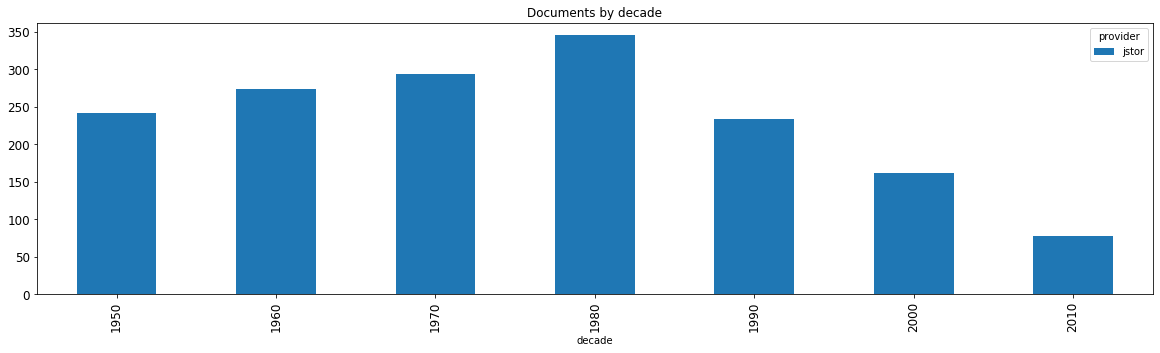

In [108]:
df.groupby(['decade', 'provider'])['id'].agg('count').unstack()\
    .plot.bar(title='Documents by decade', figsize=(20, 5), fontsize=12, stacked=True); ##There is a weird bug where this cell needs to be run twice.

And now let's look at the total page numbers by decade.

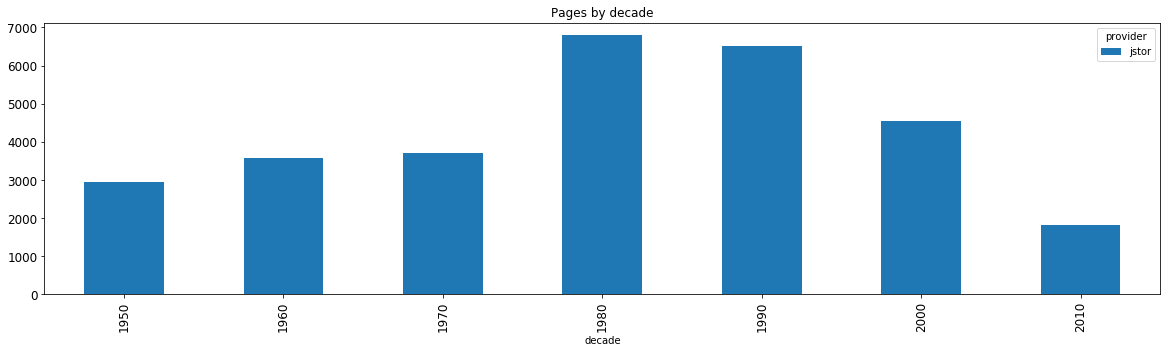

In [109]:
df.groupby(['decade', 'provider'])['pageCount'].agg('sum').unstack()\
    .plot.bar(title='Pages by decade', figsize=(20, 5), fontsize=12, stacked=True);

___

# Start Next Lesson: [Exploring Word Frequencies](./1-word-frequencies.ipynb)